In [12]:
from nanorsm import *

# tot = sum_all_h5_data_db(['212947'],'eiger1') 
# plt.figure()
# plt.imshow(np.log10(tot))

In [1]:
import h5py
filename = "/data/users/2023Q1/Huang_2023Q1/FIP_ptycho/scan_212947.h5"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    #data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    #data = list(f[a_group_key])
    # preferred methods to get dataset values:
    #ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f['diffamp'][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['angle', 'ccd_pixel_um', 'diffamp', 'dr_x', 'dr_y', 'lambda_nm', 'points', 'x_range', 'y_range', 'z_m']>
<class 'h5py._hl.dataset.Dataset'>


In [2]:
 ds_arr.shape

(10201, 220, 220)

In [4]:
import numpy as np
sz = ds_arr.shape
tot = np.sum(np.sum(ds_arr**2,-1),-1)


(10201,)

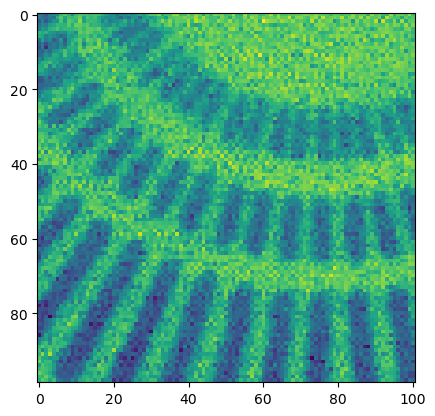

In [8]:
from matplotlib import pyplot as plt
tot = np.reshape(tot,[101,101])
plt.imshow(tot[1:-1,:])

In [11]:
import tifffile
tifffile.imsave('/data/users/2023Q1/Yan_2023Q1/212947_tot.tif',np.float32(tot[1:-1,:]))

/tmp/ipykernel_31174/1741054360.py:2: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave('/data/users/2023Q1/Yan_2023Q1/212947_tot.tif',np.float32(tot[1:-1,:]))


In [6]:
%matplotlib inline

In [56]:

im = load_h5_data_db(['244703'],'eiger1')
# plt.imshow(np.squeeze(im[0,:,:]))
np.percentile(im.ravel(),99.999999)


Progress:   0%|          | 0/1 [00:00<?, ?it/s]

Total scan points: 2500; raw image row: 409; raw image col: 412
Total scan points: 2500; data image row: 409; data image col: 412
Assume it is a rocking curve scan; number of angles = 2500


20.0

In [57]:
his.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
tifffile.imwrite('/data/users/2023Q3/MLL_comissioning/244707_single_frame.tif',np.float32(np.squeeze(im[0,:,:])))

In [ ]:
np.sum(im.ravel())